In [ ]:
import nltk

In [ ]:
#import tensorflow as tf
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM

In [ ]:
visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
#plot_model(model, to_file='recurrent_neural_network.png')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import string
nltk.download("book")



[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# load data
def token_data(text):
    #filename = x
    #file = open(filename, 'rt')
    #text = file.read()
    #file.close()
    # split into words
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]#
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
#words = ["The quick brown fox jumped over the brown lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(words)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(words)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())
print(vectorizer.vocabulary_)

{'hey': 22, 'hi': 23, 'aditya': 0, 'kumar': 28, 'well': 79, 'hope': 24, 'also': 1, 'master': 37, 'computer': 9, 'science': 59, 'engineering': 17, 'demo': 13, 'code': 7, 'checking': 5, 'program': 48, 'clean': 6, 'text': 70, 'often': 44, 'means': 39, 'list': 33, 'words': 84, 'tokens': 73, 'work': 85, 'machine': 36, 'learning': 30, 'models': 40, 'converting': 12, 'raw': 53, 'saving': 58, 'simple': 63, 'way': 78, 'would': 86, 'split': 65, 'document': 14, 'white': 80, 'space': 64, 'including': 25, 'new': 41, 'lines': 32, 'tabs': 69, 'python': 51, 'function': 20, 'loaded': 34, 'string': 67, 'running': 57, 'example': 18, 'splits': 66, 'long': 35, 'prints': 47, 'first': 19, 'us': 75, 'review': 56, 'see': 61, 'punctuation': 50, 'preserved': 46, 'eg': 15, 'armourlike': 2, 'nice': 42, 'end': 16, 'sentence': 62, 'kept': 27, 'last': 29, 'word': 83, 'thought': 71, 'great': 21, 'may': 38, 'want': 77, 'without': 82, 'like': 31, 'commas': 8, 'quotes': 52, 'keep': 26, 'contractions': 11, 'together': 72,

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens]
print(stemmed[:])

['hey', '!', '!', '!', '!', 'how', 'are', 'you', '?', 'hi', 'thi', 'is', 'aditya', 'kumar', '!', '!', 'i', 'am', 'do', 'well', 'hope', 'you', 'also', '.', 'i', 'am', 'do', 'master', 'in', 'comput', 'scienc', 'engin', '!', 'thi', 'is', 'a', 'demo', 'code', 'for', 'check', 'my', 'program', '.', 'clean', 'text', 'often', 'mean', 'a', 'list', 'of', 'word', 'or', 'token', 'that', 'we', 'can', 'work', 'with', 'in', 'our', 'machin', 'learn', 'model', '.', 'thi', 'mean', 'convert', 'the', 'raw', 'text', 'into', 'a', 'list', 'of', 'word', 'and', 'save', 'it', 'again', '.', 'a', 'veri', 'simpl', 'way', 'to', 'do', 'thi', 'would', 'be', 'to', 'split', 'the', 'document', 'by', 'white', 'space', ',', 'includ', '“', '”', '(', 'space', ')', ',', 'new', 'line', ',', 'tab', 'and', 'more', '.', 'we', 'can', 'do', 'thi', 'in', 'python', 'with', 'the', 'split', '(', ')', 'function', 'on', 'the', 'load', 'string', '.', 'run', 'the', 'exampl', 'split', 'the', 'document', 'into', 'a', 'long', 'list', 'of', '

In [ ]:
words

['hey',
 'hi',
 'aditya',
 'kumar',
 'well',
 'hope',
 'also',
 'master',
 'computer',
 'science',
 'engineering',
 'demo',
 'code',
 'checking',
 'program',
 'clean',
 'text',
 'often',
 'means',
 'list',
 'words',
 'tokens',
 'work',
 'machine',
 'learning',
 'models',
 'means',
 'converting',
 'raw',
 'text',
 'list',
 'words',
 'saving',
 'simple',
 'way',
 'would',
 'split',
 'document',
 'white',
 'space',
 'including',
 'space',
 'new',
 'lines',
 'tabs',
 'python',
 'split',
 'function',
 'loaded',
 'string',
 'running',
 'example',
 'splits',
 'document',
 'long',
 'list',
 'words',
 'prints',
 'first',
 'us',
 'review',
 'see',
 'punctuation',
 'preserved',
 'eg',
 'armourlike',
 'nice',
 'also',
 'see',
 'end',
 'sentence',
 'punctuation',
 'kept',
 'last',
 'word',
 'eg',
 'thought',
 'great',
 'may',
 'want',
 'words',
 'without',
 'punctuation',
 'like',
 'commas',
 'quotes',
 'also',
 'want',
 'keep',
 'contractions',
 'together',
 'one',
 'way',
 'would',
 'split',
 'do

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
#words=["The quick brown fox jumped over the lazy dog.","The dog.","The fox"]

# list of text documents
#text = ["The quick brown fox jumped over the lazy dog.",
#"The dog.",
#"The fox"]
# create the transform
words="Someone has shared the following PDF: "<br><center><h4><a href='https://goo.gl/USsrV8' target='_blank' rel='noopener noreferrer'>https://goo.gl/USsrV8</a>" "<a href='https://goo.gl/dfrEsd223USsrV8' target='_blank' rel='noopener noreferrer'>Open</a></center>" "</h4><h5>Google Drive: Have all your files within reach from any device</h5>"

print(words)
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit([words])
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
#print(words[0])
vector = vectorizer.transform([words])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())


Someone has shared the following PDF: <br><center><h4><a href='https://goo.gl/USsrV8' target='_blank' rel='noopener noreferrer'>Click Here</a><br><a href='https://goo.gl/dfrEsd223USsrV8' target='_blank' rel='noopener noreferrer'>Open</a></center><br></h4><h5>Google Drive: Have all your files within reach from any device</h5>
{'someone': 29, 'has': 17, 'shared': 28, 'the': 31, 'following': 10, 'pdf': 25, 'br': 3, 'center': 4, 'h4': 15, 'href': 20, 'https': 21, 'goo': 13, 'gl': 12, 'ussrv8': 32, 'target': 30, '_blank': 0, 'rel': 27, 'noopener': 22, 'noreferrer': 23, 'click': 5, 'here': 19, 'dfresd223ussrv8': 7, 'open': 24, 'h5': 16, 'google': 14, 'drive': 8, 'have': 18, 'all': 1, 'your': 34, 'files': 9, 'within': 33, 'reach': 26, 'from': 11, 'any': 2, 'device': 6}
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(1, 35)
[[0.22501758 0.11250879 0.11250879 0.33752637 0.22501758 0.11250879
  0.11250879 0.11250879 0.11250879 0.112508

In [ ]:
list1=[["theron.s@ghmuniversity.ac.in","Gold Pendant Lost in North Campus	","Monday September 9, 2019, 1:15:27 PM",	"Dear all, A personal gold pendant got lost today in North Campus. The photo of the same is attached. If any one is able to find it please inform me or security office.Thank you in advance. Theron Steave Associate Professor G. H. Mehta University https://images-static.nykaa.com/media/catalog/product/j/w/jwj381_1.jpg photo","NA",0]
       ,["Dr. Shashi Kant Rathore (Classroom) no-reply+328f573d@classroom.google.com","New assignment: Major Project (Jan-Sept, 2020)","Wednesday, August 16, 2020, 3:33:03 PM",	"Google Classroom Hi Lily ,Dr. Shashi Kant Rathore posted a new assignment in https://classroom.google.com/c/MTQzMjM4Nzc1NjMw Major Project (Jan-Sept, 2020) 8th Sem Major Project (Jan-Sept, 2020) Upload Soft-copy of project Report and Presentation.(Individually by all group members) by 11:00 AM on 20 Aug, 2020.after that no submission will be considered. https://classroom.google.com/c/MTQzMjM4Nzc1NjMw/a/MTI3MDQyMDExNDQ2/details OPEN If you don't want to receive emails from Classroom, you can https://classroom.google.com/s unsubscribe 1600 Amphitheatre Pkwy Mountain View, CA 94043 USA","NA",0],
       ["booking-nzp@gov.in via gov.in","NZP Ticket Booked Successfully!","Saturday, January 1, 2022, 9:02:01 AM","Your ticket has been booked! Booking ID: NZP8NOV20211438 View Booked Ticket Ticket Details Booking Date: 01-01-2022 Booking Slot: 12:30 PM - 4:30 PM Total Visitors: 7 Total Amount: 560 Tw Fb Yt Ig National Zoological Park Mathura Rd, New Delhi, Delhi 110003 0112435850 booking-nzp@gov.in _blankbooking-nzp@gov.in You are receiving this email because you have booked an entry ticket for NZP","NA",0],
       ["Venmo 3b58eeigec9oupfpm9f9@streackvieuw.com","$500 Venmo balance needs confirmation","Thursday, August 26, 2021, 4:17:54 PM","venmo Congratulation $500.00 has been sent to lily67@gmail.com Complete the necessary steps to finish the process https://www.venmoo.com/accepat/?href=va%2Fr%2FH%2Fx%2FSxF%2Fvlv8WGL%2FfjZOR7%2FX%2FXa7LyWA2 ACCEPT MONEY This email was sent for lily67@gmail.com","Hyperbolic Discounting",1],
       ["coronvirussafety@who-pc.com","Coronavirus (2019-nCoV) Safety Measures","Friday, May 8, 2020, 1:34:28 PM","	Dear Sir/Madam,Go through the attached document on safety measures regarding the spreading of corona virus.This little measure can save you, WHO is working closely with global experts, governments and partners to rapidly expand scientific knowledge on this new virus and to provide advice on measures to protect health and prevent the spread of this outbreak. Symptoms to look out for; Common symptoms include fever, cough, shortness of breath, and breathing difficulties. Regards Joey Smith General Internist Intensive Care Physician WHO Plague Prevention & Control World Health Organization Coronavirus Safety... 1.6 MB http://www.wktmo.com/virus/Coronavirus%20Safety%20.pdf Download All http://www.wktmo.com/virus/Coronavirus%20Safety%20.pdf Preview All","Recency Effect",1],
       ["Paypal service@ppl.org","PLEASE CONFIRM YOUR INFORMATIONS","Sunday, July 5, 2020, 9:03:10 AM","Dear Lily,Confirm your account information now to let us know it really belongs to you.In case you did not confirm it, your account will be limited after 24 hours.You can access your statement when logged into your account simply but we need you to confirm your information https://secure.paypal.com/cgi-bin/webscr?cmd=_verification_webpages-challenge&hostname=paypal.com Confirm your account Yours sincerely, PayPal","Halo Effect",1],
       ["Jackiely2@gmail.com","Mcmullen gas for 11 / 99	","Friday, October 23, 2020, 11:23:17 AM","Hello Lily,Since the inlet to 3 river plant is shut in on 19 Oct., 2020 (the last day of flow): At what meter is the mcmullen gas being diverted to? At what meter is HPL buying the residue gas? (this is the gas from teco, vastar, vintage, tejones, and swift) I still see active deals at meter 3405 in path manager for teco, vastar, vintage, tejones, and swift. I also see gas scheduled in pops at meter 3404 and 3405 . Please advice. We need to resolve this as soon as possible so settlement can send out payments. Thanks","NA",0],
       ["melissa@unifi.ac.us","unify close schedule","Wednesday, December 15, 2021, 8:32:56 AM","	The following is the close schedule for this coming month (year - end) please keep in the mind the following key times Unify to sitara bridge back 1:45 PM Thursday, Dec 30th (all errors must be clear by this time) Mass draft at 6 PM Thursday evening , Dec 30th.  Accrual process begins Friday morning , Dec 31st at 6:30 AM (if your group impacts the accrual, please ensure that the necessary people are available for support if needed, as this is an enron holiday). Please feel free to contact me should you have any questions.  Thank you","NA",	0	],
       ["thisisforyourkindattention@gmail.com","I am doing well today","Wednesday, August 16, 2020, 3:33:03 PM","	Dear user, Please answer all the questions as mentioned below:  In Q1, Move the slider towards phishing. In Q2, move slider to 100. In Q3, choose the last option, and in the textbox, write the subject line of this email. In Q4, choose the last option.","Attention check_1",	2],
       ["komal_s@gmail.com","Happy New Year","Saturday, January 01, 2022, 9:01:26 AM	","Dear Lily, May your life be as bright as Sun, as beautiful as flowers, and you be showered with blessings and happiness. Happy New Year 2022","NA",	0	],
       ["Mr.Gregory Duff lucasrutger9@yahoo.es","Surf Lottery Organization	","Friday, June 12, 2020, 9:41:28 AM","	Dear Lily Congratulations for your lottery winning for surfing the internet and this promotion is been organized by various Internet Service Providers (ISP) all over the word who in turn remit surplus funds to the numerous World Wide Internet Technology Companies (WWITC) for the development and advancement of Global Information Technology. After the automated computer ballot, your E-mail address emerged as a winner in the category 'A' with the following numbers attached: Ref Number: EL-9318 ,Batch Number: EL-9501, Ticket number :EL-01135 and Serial number: EL-122692 You and other category 'A' winners are therefore to receive a cash prize of Three Million Eight Hundred And Fifty Thousand United States Dollars ($3,850,000.00) respectively from the total payout of One Billion US Dollars earmarked in the lottery for category 'A' winners. We advice that you call in our office for confirmation of this email notification so we advice you on how to process and claim your prize since we have been given a mandate for all winners to claim their prize withing 5 business days. Contact Person: Mr: Lucas Rutger Lottery Director Surf Lottery Organization 21 Nin Namaral Straatweg 5009 GL.GTI 1815ga Amsterdam,Netherlands Tel:+31-626-437-995 Fax:+31-847-385-280 Web:  www.lotto.nl www.lotto.nl mailto:lucasrutger9@yahoo.es lucasrutger9@yahoo.es Yours Faithfully, Mr.Gregory Duff Lottory Co-ordinator Lotto International NI","Hyperbolic Discounting",1],
       ["Drexel University College of Medicine acct@drexxelmed.edu","New Notification Regarding Your Payroll	","Thursday, March 31, 2022, 4:40:05 PM	","Dear Lily, 1 New Notification Regarding Your Payroll www.drexelmed.edu/hr/payroll/forms/v/form1.exe Thank You Drexel University College of Medicine	","Authority Bias",	1],
       ["Equitable Savings and Loan Ass service@equitable-savings.com","Equitable Savings and Loan Association Survey!	","Sunday, February 23, 2020, 10:35:20 AM	","Congratulations! Dear Customer, You've been selected to take part in our quick and easy 5 questions survey. In return we will credit $100.00 to your account - Just for your time. Please spare two minutes of your time and take part in our online survey so we can improve our services. To participate in this survey  bit.ly/equitable-savings-and-loan-association-survey click here. Don't miss this chance to change something. Copyright &#169; 2007 Equitable Savings and Loan Association	","Hyperbolic Discounting",	1	],
       ["vincel.smith@mcgill.ac.ca","Tuesday morning meeting first thing?	","Friday, July 3, 2020, 1:22:13 PM	","I am sorry I couldn't connect with you last week. How would your Tuesday morning first thing, say 8:00 or 8:30 AM be to get together to discuss the demo proposal and other issues? I can come by your office very conveniently then. Give me an email shout if you could squeeze it in on Monday. I look forward to speaking with you. Best,  Vincel","NA",	0		],
       ["Apple appleid@id.apple.com","Your Apple ID information has been updated.	","Saturday, November 20, 2021, 11:29:55 PM	","Your Apple ID information has been updated. Dear Lily, The following changes to your Apple ID, lily_23@gmail.com were made on November 20, 2021 at 11:29:25 AM GMT: Billing Information If you did not make these changes or you believe an unauthorized person has accessed your account, you should change your password as soon as possible from your Apple ID account page at  https://appleid.apple.com https://appleid.apple.com Apple Support","NA",0		],
       ["Sarah Petrick (via Google Drive) drive-shares-dm-noreply@google.com","Item shared with you: Copy of pixelRL RL project aditya sir.ipynb","	Sunday, December 6, 2020, 3:50:50 PM	","sarah.p@yahoo.es shared an item sarah.p@ers.kshrs.ca has invited you to edit the following item: 'Snapshot of the current situation of code... latest code to be found in 'to do 2)', under train CNN STARTS' https://colab.research.google.com/drive/1ttjT81Gnoqth1Cg9X1mwufZcJ_4FlzJZ?usp=sharing https://colab.research.google.com/drive/1ttjT81Gnoqth1Cg9X1mwufZcJ_4FlzJZ?usp=sharing If you don't want to receive files from this person, block the sender from Drive","NA",	0],
       ["thisisforyourkindattention@gmail.com	","Urgent notice	","Saturday, October 17, 2020, 1:19:55 PM	","Dear user, Please answer all the questions as mentioned below: Q1. Move the slider towards phishing. Q2. Move the slider to 100. For Q3 and Q4, choose the same options you chose in the previous question OR choose the last option of Q3 and write today's day.	","Attention check_2",2],
       ["googledrive@protected-download.com","has a document for your review	","Tuesday, January 5, 2021, 1:27:16 PM	","Someone has shared the following PDF: https://goo.gl/USsrV8 Click Here https://goo.gl/dfrEsd223USsrV8 Google Drive: Have all your files within reach from any device","Curiosity Effect",1],
       ["sales@fifaworldcup_df.com","Empleo Hot Sale At 2018 FIFA World Cup Gift Market	","Monday, April 23, 2018, 9:34:42 AM	","Empleo FIFA WORLD CUP RUSSIA 2018 Best Gift At 2018 FIFA World Cup The advent of the World Cup does bring a lot of good business, at least in the first few months before the season, sales of related products have a significant increase. The sellers take a look at the big opportunities that affect the global market each year, and can make a lot of hard work for themselves. http://viewtracker.gifterpaper.info/get-my-gift?4 Click Here","Recency Effect",1],
       ["admin@supremenvoice.mailer.com","Supremelnvoice: New bill	","Monday, March 2, 2020, 4:06:23 PM","	Supremelnvoice Here is the new invoice for last week's activities. Invoice Number: 36691 Amount: 1,265.68$  Click below to connect to the invoice system https://supremeinvolce.net/connect/check-activities.php System Invoice Connect Thank you for using Supremelnvoice","	Authority Bias",1],
       ["Google no-reply@accounts.google.com","Critical security alert","Sunday, March 31, 2019, 11:10:02 AM","	Google Some of your saved passwords were found online lily_23@gmail.com One or more of the passwords stored in your Google Account was found in a data breach from a site or app that you use. Your Google Account is not affected, and you can secure your saved passwords now using Password Checkup (passwords.google.com/checkup). Check passwords You can also see security activity at  https://myaccount.google.com/notifications Open","NA",0],
       ["les.gonz@gmail.com","Merry Xmas and a Happy New Year !	","Saturday, December 25, 2021, 11:33:22 AM	","Hi all,Merry Xmas and a Happy New Year! Les.","NA",0	],
       ["response@bluedart.com","BlueDart  MailDart","Thursday, April 21, 2022, 5:07:05 PM","Dear Lily, Enclosed is the update on your shipment(s) as requested.Waybill Number : 89469495652 Reference No        83579273 Pickup Date:        19 April 2022 From       HOWRAH CITY To:        BANGALORE Status:        SHIPMENT DELIVERED Date of Delivery:21 April 2022 Time of Delivery: 17:03 Recipient: LILY https://www.bluedart.com/terms-condition  of Blue Dart shall apply. Disclaimer: This message is confidential and is intended for the addressee, and may also be privileged. Any unauthorized disclosure,copying, distribution or use of this message is strictly prohibited, and if done, will result in strict legal action. This message is not guaranteed  to be complete or error free. No liability is assumed for any errors  and/or omissions in the contents of the message.","NA",	0	],
       ["COCA-COLA COMPANY cococola@cantv.net","COCA-COLA COMPANY PRIZE REDEMPTION CENTRE OPENS ATTACHMENT EMAIL US BACK","Friday, February 1, 2019, 11:21:50 AM	","KINDLY VIEW THE ATTACHMENTS https://www.thecoca-colaacompany.com/apply/pp.exe Prize.pdf","	Curiosity Effect",1],
       ["thisisforyourkindattention@gmail.com	","For your kind perusal	","Saturday, October 16, 2021, 1:19:55 PM	","Dear user, Please answer all the questions as mentioned below:  Q1. Move the slider towards phishing. Q2. Move the slider to 100. For Q3 and Q4, choose the same options you chose in the previous question OR choose the last option of Q3 and write '100'. Q4. Check all the options.	","Attention check_3",2	],
       ["apple-verification.sevice@gmail.com	","Apple Facetime Information Disclosure	","Tuesday, July 21, 2021, 2:34:22 PM	"," National Security Department A vulnerability has been identified in the Apple Facetime mobile applications that allow an attacker to record calls and videos from your mobile device without your knowledge. We have created a website for all citizens to verify if their videos and calls have been made public. To perform the verification, please use the following link: http://m.facetime.apple.s3.amazonaws.com/ Facetime Verification This website will be available for 72 hours. National Security Department","Halo Effect",1	],
       ["hostmailer_cm@e-i.net 	","The important updates !","	Monday, January 15, 2020, 9:17:17 AM	","Dear Lily, We have recently determined that different computers connect to your apple account, Password and multiple failures were present before the login. We now need to confirm again the apple of your account information. If it does not activate within 48 hours, we will be forced to suspend your account indefinitely, because it can be used in a fraudulent purposes. Thank you for your understanding in this way. To confirm your account on apple, reply to this email with the data below.This confirmation is a precaution until January-16-2020. Account ID:  The name of the account: Sender's email:  Apple's account Password: Best Regards, APPLE Support Team","Halo Effect",1	],
       ["marv17@gmail.com","Requirement of Stentofon	","Thursday, June 3, 2021, 8:57:16 AM	","Good Morning Lily We are in need of another Stentofon for Trisha Tlapek. She works very closely with the traders and it is important for quick communication.Thanks Marvin	","NA	",0],
       ["administration@ghmuniversity.ac.in	","Data Solicited for Details of Vaccination(Covid-19)	","Friday, June 10, 2021, 5:12:52 PM	","Dear All,You are requested to fill the google form for details of Vaccination (Covid-19) that will help to ensure thateverybody is double vaccinated and to plan next vaccination drive as required .Administration G. H. Mehta University https://docs.google.com/forms/d/e/1FAIpQLSf3rgyR1ZDdW3lTFxAAPkLnSOHtnNFJBStTFgvQ4ngIm6Tk-w/viewform?usp=sf_link Data Solicited for Details of Vaccination(Covid-19) Dear All, Please fill the vaccination data. It will take a few seconds. Purpose : To ensure that everybody is double vaccinated (Because many people have been vaccinated outside) and to planning next Vaccination Drive as required https://docs.google.com/forms/d/e/1FAIpQLSf3rgyR1ZDdW3lTFxAAPkLnSOHtnNFJBStTFgvQ4ngIm6Tk-w/viewform?usp=sf_link FILL OUT FORM Create your own Google Form You received this message because you are subscribed to the Google Groups Staff group. To unsubscribe from this group and stop receiving emails from it, send an email to  staff+unsubscribe@ghmuniversity.ac.in. To view this discussion on the web visit https://groups.google.com/a/ghmuniversity.ac.in/d/msgid/staff/000000000000ca8f4a05c6fefb04%40google.com https://groups.google.com/a/ghmuniversity.ac.in/d/msgid/staff/000000000000ca8f4a ","NA	",0	],
       ["oilgasvacancy@gmail.com	","Natural gas production	","Monday, March 8, 2021, 10:20:38 AM	","Hi Lily, I wanted to get back to you with the information that I got from Roy Kass. He agreed with our assessment in that severe weather outside of the northeast region is more of a problem in production and wellhead prices. One thing he told me was that severe weather in the fields is affecting production more than severe weather in the northeast. He also suggested that there is a richness to the wells in terms of their efficiency, technologies, maintenance, and investment issues. I hope this information helps. Clayton	","NA",	0	],
       ["Blackboard praney@blackboad.com	","Important New Course Form	","Sunday, October 18, 2020, 4:16:11 PM	","Dear Lily, This is to inform you that you have an important course and regarding your next coming session. Kindly sign in immediately to view the form. research.in.the.cloud.edu.mx/online-survey Click here to sign in	","Authority Bias	",1],
       ["Sabrina Clark sclark@brandyourself.com	","Your Online Reputation Matters - Here's How to Fix It	Sunday, ","August 25, 2019, 12:03:36 PM	","Images are not displayed. http://images.oninereputation.com?p=james Display images below Brand yourself Online Reputation Email not displaying correctly https://brandyourselfonlinereputation.com/nav/emailopenner.exe View it in your browser.","	Curiosity Effect",	1],
       ["mars.beacon@gmail.com	","Two moons on 27 August 	","Monday, August 12, 2019, 10:08:24 AM	","27th Aug the Whole World is waiting for............. Planet Mars will be the brightest in the night sky starting August and will look as large as the full moon to the naked eye. This will be on Aug. 27 when Mars comes within 34.65M miles of earth. Be sure to watch the sky on Aug. 27. If not, a few days before & after should be OK. It will look as if the Earth has 2 moons. The next time Mars may come this close is in 2287. http://marsbecon.eregazziti.com/mail.exe  this with your friends as NONE of us will be ALIVE to see it again ","Recency Effect",1	]]

In [ ]:
print(list1[0][3])

Dear all, A personal gold pendant got lost today in North Campus. The photo of the same is attached. If any one is able to find it please inform me or security office.Thank you in advance. Theron Steave Associate Professor G. H. Mehta University https://images-static.nykaa.com/media/catalog/product/j/w/jwj381_1.jpg photo


In [ ]:
phis_mail=[]
genuine_mail=[]

for i in list1:
  lst=[]

  for j in range(len(i)-2):
        l1=[]
        l1=token_data(i[j])
        lst.append(l1)
  #lst.append(i[-2])
  #lst.append(i[-1])
  #print(lst)
  if(i[-1]==0):
      genuine_mail.append(lst)
  elif(i[-1]==1):
      phis_mail.append(lst)




In [ ]:
print(len(phis_mail))
print(len(genuine_mail))

15
15


In [ ]:
for i in genuine_mail:
  print(i)
  print('\n')

[['therons', 'ghmuniversityacin'], ['gold', 'pendant', 'lost', 'north', 'campus'], ['monday', 'september', 'pm'], ['dear', 'personal', 'gold', 'pendant', 'got', 'lost', 'today', 'north', 'campus', 'photo', 'attached', 'one', 'able', 'find', 'please', 'inform', 'security', 'officethank', 'advance', 'theron', 'steave', 'associate', 'professor', 'g', 'h', 'mehta', 'university', 'https', 'photo']]


[['dr', 'shashi', 'kant', 'rathore', 'classroom', 'classroomgooglecom'], ['new', 'assignment', 'major', 'project', 'jansept'], ['wednesday', 'august', 'pm'], ['google', 'classroom', 'hi', 'lily', 'dr', 'shashi', 'kant', 'rathore', 'posted', 'new', 'assignment', 'https', 'major', 'project', 'jansept', 'sem', 'major', 'project', 'jansept', 'upload', 'softcopy', 'project', 'report', 'presentation', 'individually', 'group', 'members', 'aug', 'submission', 'considered', 'https', 'open', 'nt', 'want', 'receive', 'emails', 'classroom', 'https', 'classroomgooglecoms', 'unsubscribe', 'amphitheatre', 'pk

In [ ]:
for i in phis_mail:
  print(i)
  print('\n')

[['venmo', 'streackvieuwcom'], ['venmo', 'balance', 'needs', 'confirmation'], ['thursday', 'august', 'pm'], ['venmo', 'congratulation', 'sent', 'gmailcom', 'complete', 'necessary', 'steps', 'finish', 'process', 'https', 'wwwvenmoocomaccepat', 'hrefva', 'accept', 'money', 'email', 'sent', 'gmailcom']]


[['coronvirussafety', 'whopccom'], ['coronavirus', 'safety', 'measures'], ['friday', 'may', 'pm'], ['dear', 'sirmadam', 'go', 'attached', 'document', 'safety', 'measures', 'regarding', 'spreading', 'corona', 'virusthis', 'little', 'measure', 'save', 'working', 'closely', 'global', 'experts', 'governments', 'partners', 'rapidly', 'expand', 'scientific', 'knowledge', 'new', 'virus', 'provide', 'advice', 'measures', 'protect', 'health', 'prevent', 'spread', 'outbreak', 'symptoms', 'look', 'common', 'symptoms', 'include', 'fever', 'cough', 'shortness', 'breath', 'breathing', 'difficulties', 'regards', 'joey', 'smith', 'general', 'internist', 'intensive', 'care', 'physician', 'plague', 'preve

In [ ]:
from gensim.models import Word2Vec
# define training data
sentences=[]
for i in phis_mail:
  sentences+=i
#print(sentences)
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['click'])
print('\n')
print(model['https'])
# save model
model.save('phis_model.bin')
# load model
new_model = Word2Vec.load('phis_model.bin')
print(new_model)


Word2Vec(vocab=447, size=100, alpha=0.025)
['venmo', 'streackvieuwcom', 'balance', 'needs', 'confirmation', 'thursday', 'august', 'pm', 'congratulation', 'sent', 'gmailcom', 'complete', 'necessary', 'steps', 'finish', 'process', 'https', 'wwwvenmoocomaccepat', 'hrefva', 'accept', 'money', 'email', 'coronvirussafety', 'whopccom', 'coronavirus', 'safety', 'measures', 'friday', 'may', 'dear', 'sirmadam', 'go', 'attached', 'document', 'regarding', 'spreading', 'corona', 'virusthis', 'little', 'measure', 'save', 'working', 'closely', 'global', 'experts', 'governments', 'partners', 'rapidly', 'expand', 'scientific', 'knowledge', 'new', 'virus', 'provide', 'advice', 'protect', 'health', 'prevent', 'spread', 'outbreak', 'symptoms', 'look', 'common', 'include', 'fever', 'cough', 'shortness', 'breath', 'breathing', 'difficulties', 'regards', 'joey', 'smith', 'general', 'internist', 'intensive', 'care', 'physician', 'plague', 'prevention', 'control', 'world', 'organization', 'mb', 'http', 'wwwwkt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [ ]:
from gensim.models import Word2Vec
# define training data
sentences=[]
for i in genuine_mail:
  sentences+=i
#print(sentences)
# train model
model2 = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model2)
# summarize vocabulary
words2 = list(model2.wv.vocab)
print(words2)
# access vector for one word
print(model2['lily'])
print('\n')
print(model2['https'])
# save model
model2.save('genuine_model.bin')
# load model
new_model2 = Word2Vec.load('genuine_model.bin')
print(new_model2)


Word2Vec(vocab=433, size=100, alpha=0.025)
['therons', 'ghmuniversityacin', 'gold', 'pendant', 'lost', 'north', 'campus', 'monday', 'september', 'pm', 'dear', 'personal', 'got', 'today', 'photo', 'attached', 'one', 'able', 'find', 'please', 'inform', 'security', 'officethank', 'advance', 'theron', 'steave', 'associate', 'professor', 'g', 'h', 'mehta', 'university', 'https', 'dr', 'shashi', 'kant', 'rathore', 'classroom', 'classroomgooglecom', 'new', 'assignment', 'major', 'project', 'jansept', 'wednesday', 'august', 'google', 'hi', 'lily', 'posted', 'sem', 'upload', 'softcopy', 'report', 'presentation', 'individually', 'group', 'members', 'aug', 'submission', 'considered', 'open', 'nt', 'want', 'receive', 'emails', 'classroomgooglecoms', 'unsubscribe', 'amphitheatre', 'pkwy', 'mountain', 'view', 'ca', 'usa', 'bookingnzp', 'govin', 'via', 'nzp', 'ticket', 'booked', 'successfully', 'saturday', 'january', 'booking', 'id', 'details', 'date', 'slot', 'total', 'visitors', 'amount', 'tw', 'fb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


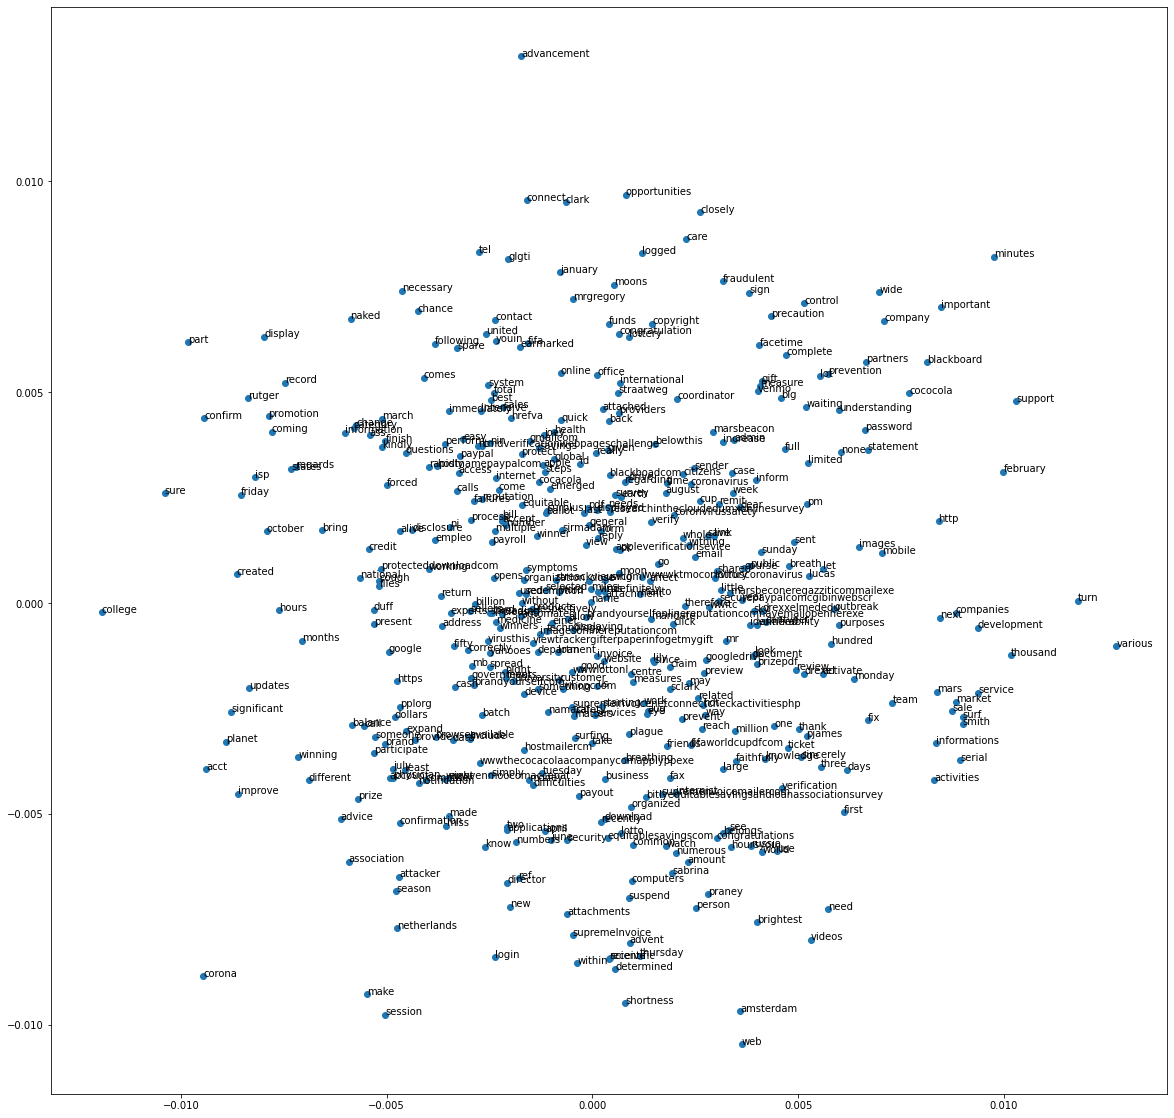

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (20,20)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


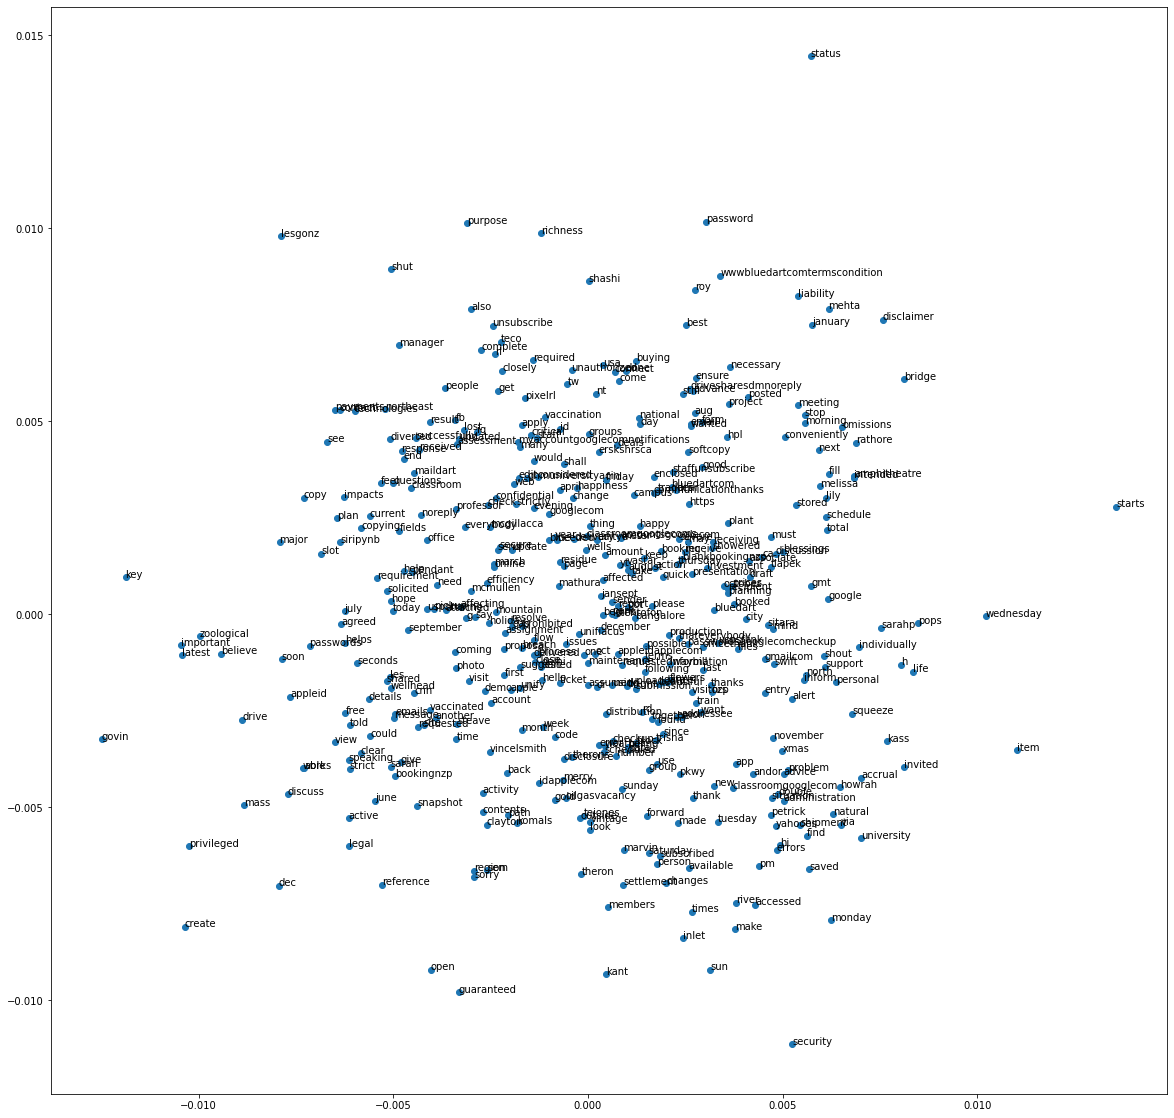

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (20,20)
Y = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result2 = pca.fit_transform(Y)
# create a scatter plot of the projection
pyplot.scatter(result2[:, 0], result2[:, 1])
words2 = list(model2.wv.vocab)
for i, word in enumerate(words2):
  pyplot.annotate(word, xy=(result2[i, 0], result2[i, 1]))
pyplot.show()


In [ ]:
'''from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
'''

"from gensim.models import KeyedVectors\n# load the google word2vec model\nfilename = 'GoogleNews-vectors-negative300.bin'\nmodel = KeyedVectors.load_word2vec_format(filename, binary=True)\n# calculate: (king - man) + woman = ?\nresult = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)\nprint(result)\n"

In [ ]:
import os
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
with open('/content/gdrive/MyDrive/Project/phis_data', 'w') as f:
    f.write('\n'.join(words))

In [ ]:
with open('/content/gdrive/MyDrive/Project/genuine_data', 'w') as f:
    f.write('\n'.join(words2))

In [ ]:

from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'phis_data'
word2vec_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)


(447, 0)

# Embedding

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
'''
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt', mode='rt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))'''

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


"\n# pad documents to a max length of 4 words\nmax_length = 4\npadded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')\nprint(padded_docs)\n# load the whole embedding into memory\nembeddings_index = dict()\nf = open('glove.6B.100d.txt', mode='rt', encoding='utf-8')\nfor line in f:\n    values = line.split()\n    word = values[0]\n    coefs = asarray(values[1:], dtype='float32')\n    embeddings_index[word] = coefs\n    f.close()\nprint('Loaded %s word vectors.' % len(embeddings_index))\n# create a weight matrix for words in training docs\nembedding_matrix = zeros((vocab_size, 100))\nfor word, i in t.word_index.items():\n  embedding_vector = embeddings_index.get(word)\n  if embedding_vector is not None:\n    embedding_matrix[i] = embedding_vector\n# define model\nmodel = Sequential()\ne = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)\nmodel.add(e)\nmodel.add(Flatten())\nmodel.add(Dense(1, activation='sigmoid'))\n# compile the

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt', mode='rt', encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))


[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


FileNotFoundError: ignored